In [1]:
import pandas as pd
import warnings; warnings.simplefilter('ignore')

training_dataSet = pd.read_csv('DecisionTrees/src/main/resources/trainingData_top10.csv')
testing_dataSet = pd.read_csv('DecisionTrees/src/main/resources/testingData_top10.csv')

training_dataSet_4000 = pd.read_csv('DecisionTrees/src/main/resources/trainingData_top10_4000.csv')
testing_dataSet_4000 = pd.read_csv('DecisionTrees/src/main/resources/testingData_top10_4000.csv')

training_dataSet_9000 = pd.read_csv('DecisionTrees/src/main/resources/trainingData_top10_9000.csv')
testing_dataSet_9000 = pd.read_csv('DecisionTrees/src/main/resources/testingData_top10_9000.csv')

training_dataSet['label'] = training_dataSet['label'].map({'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9})
testing_dataSet['label'] = testing_dataSet['label'].map({'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9})

In [2]:
y_train = training_dataSet['label']
y_test = testing_dataSet['label']
X_train = training_dataSet.drop("label", axis=1)
X_test = testing_dataSet.drop("label", axis=1)

In [3]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [4]:
# Using training and testing data sets

from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression(solver='lbfgs', multi_class='multinomial')
y_pred_logistic = model_logistic.fit(X_train, y_train).predict(X_test)

print(y_pred_logistic[:10])
print(model_logistic.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))

# fpr, tpr, _ = roc_curve(y_test, y_pred_logistic)
# roc_area = auc(fpr, tpr)

# print(fpr)
# print(tpr)
# print(roc_area)

[4 0 1 6 1 5 6 4 4 0]
0.7817745803357314
[[263 133   6   9   2   2  14   0  14   7]
 [106 439   6  23  11  18  15   2   6   4]
 [ 14  39  81   3   4   0   7   1   1   0]
 [  4  10   0 363  30   1   1   2   4   5]
 [  3   5   2  28 589  28   2  12  19   2]
 [  5   9   2   4  54 636   5   0   5   0]
 [ 17  21   1   0   0   0 224   0   3   4]
 [  0   0   0   2   0   0   0  58   0   0]
 [ 11  22  11  22  30  23   2   4 554  11]
 [  1  14   0   0   0   1   6   2  13  53]]
              precision    recall  f1-score   support

           0       0.62      0.58      0.60       450
           1       0.63      0.70      0.66       630
           2       0.74      0.54      0.63       150
           3       0.80      0.86      0.83       420
           4       0.82      0.85      0.84       690
           5       0.90      0.88      0.89       720
           6       0.81      0.83      0.82       270
           7       0.72      0.97      0.82        60
           8       0.89      0.80      0.

In [11]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


y_trn = label_binarize(y_train, classes=[0,1,2,3,4,5,6,7,8,9])
y_tst = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8,9])

classifier = OneVsRestClassifier(model_logistic)
y_score = classifier.fit(X_train, y_trn).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_tst[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_tst.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

roc_auc

{0: 0.8106427718040621,
 1: 0.8408743610438525,
 2: 0.9159668325041459,
 3: 0.9208952380952381,
 4: 0.9825249875062468,
 5: 0.9791590177133654,
 6: 0.9573295346628681,
 7: 0.9972587185725872,
 8: 0.9630568049308679,
 9: 0.9809858387799565,
 'micro': 0.9516977113752643}

In [12]:
aux = [roc_auc[i] for i in range(10)]
print(sum(aux)/10)

0.9348694105613191


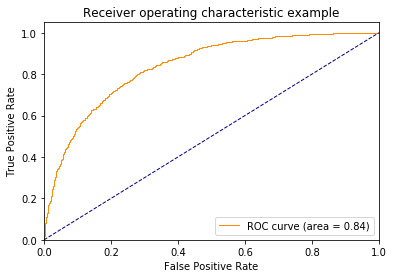

In [13]:
import matplotlib.pyplot as plt

plt.figure()
lw = 1
label = 1
plt.plot(fpr[label], tpr[label], color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[label])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()
y_pred_linear = model_linear.fit(X_train, y_train).predict(X_test)
y_pred_linear = [int(round(y)) for y in y_pred_linear]

print(y_pred_linear[:10])
print(model_linear.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))

[4, 1, 2, 5, 1, 4, 4, 4, 4, 2]
0.510147152356857
[[  0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   7  42 109 120  88  40  28  15   1   0   0   0]
 [  3  12  72 155 189 107  59  26   6   1   0   0   0]
 [  0   0   5  20  50  46  18   7   4   0   0   0   0]
 [  0   1   0  16  80 157 112  50   1   3   0   0   0]
 [  0   0   0   4  22 106 261 187  81  26   3   0   0]
 [  0   0   2  10  31 114 236 217  89  18   2   1   0]
 [  0   0   2   2  31  63 114  48   7   2   1   0   0]
 [  0   0   0   0   0   0   0   4  17  27   8   2   2]
 [  0   0   0   1   8  25  51  90 151 230 121  13   0]
 [  0   0   0   0   0   2  12  26  21  20   9   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0]]
              precision    recall  f1-score   support

          -2       0.00      0.00      0.00         0
          -1       0.00      0.00      0.00         0
           0       0.34      0.09      0.15       450
           1      

In [9]:
# 10-fold cross validation

from sklearn.model_selection import cross_val_score, cross_val_predict

score = cross_val_score(model_logistic, X_train, y_train, cv=10)
avg_accuracy = sum(score) / len(score)
print(avg_accuracy)
y_pred_cross = cross_val_predict(model_logistic, X_train, y_train, cv=10)
print(confusion_matrix(y_train, y_pred_cross))
print(classification_report(y_train, y_pred_cross))

0.8303317535545023
[[ 816  423   29   20   18    8   40    8   36   12]
 [ 296 1288   52   32   28   44   51    7   41   21]
 [  22   76  270    5    4    1   16    3   22    1]
 [   5   18    4 1211   39    6   11    2   22    2]
 [   8   30    4   36 1879   92    4    9   34    4]
 [  10   12    3   11   70 2018    4    5   21    6]
 [  24   46    1   10    1    2  687    1    5    3]
 [   6    3    3    1   11    4    5  186    6   15]
 [  14   26   20   32   29   11    9   14 1909    6]
 [   3    3    3    8    0    5   13    6   11  248]]
              precision    recall  f1-score   support

           0       0.68      0.58      0.62      1410
           1       0.67      0.69      0.68      1860
           2       0.69      0.64      0.67       420
           3       0.89      0.92      0.90      1320
           4       0.90      0.89      0.90      2100
           5       0.92      0.93      0.93      2160
           6       0.82      0.88      0.85       780
           7     